In [138]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [139]:
# Read in file 
data = pd.read_csv("../data/curated/outliers_removed.csv")

In [140]:
# Change Weekly Rental Price columns to first column
price = data["Weekly Rental Price"]
data = data.drop(["Weekly Rental Price", "Unnamed: 0"], axis = 1)
data.insert(0, "Weekly Rental Price", price)

In [141]:
data

,Weekly Rental Price,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms
0,440.0,3000,1,34652.148872,4.0,45.0,1
1,440.0,3000,1,34652.148872,4.0,45.0,1
2,440.0,3000,1,34652.148872,4.0,45.0,1
3,440.0,3000,1,34652.148872,4.0,45.0,1
4,440.0,3000,1,34652.148872,4.0,45.0,1
...,...,...,...,...,...,...,...
36395,420.0,3996,1,36889.657143,0.0,0.0,2
36396,370.0,3996,1,36889.657143,0.0,0.0,2
36397,370.0,3996,1,36889.657143,0.0,0.0,2
36398,475.0,3996,2,36889.657143,0.0,0.0,3


In [111]:
# Take out postcode column
postcode = data["Postcode"]

0        3000
1        3000
2        3000
3        3000
4        3000
         ... 
36395    3996
36396    3996
36397    3996
36398    3996
36399    3996
Name: Postcode, Length: 36400, dtype: int64

In [102]:
# Apply one hot encoding on Postcode
new_data = pd.get_dummies(data, columns = ['Postcode'])

In [81]:
# Split features and predict results
y = new_data['Weekly Rental Price']
x = new_data.iloc[:,1:]

In [83]:
# Processed X into value between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [84]:
# Split the data set into training/testing and validation sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [86]:
# Create model and train the model
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(367,)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.01)),
])

model.compile(optimizer = "adam",
              loss='mean_squared_logarithmic_error',
              metrics=['msle'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
797/797 [==============================] - 4s 3ms/step - loss: 8.9181 - msle: 7.9140 - val_loss: 2.8814 - val_msle: 1.5327
Epoch 2/100
797/797 [==============================] - 2s 2ms/step - loss: 2.2432 - msle: 0.9182 - val_loss: 1.8536 - val_msle: 0.6109
Epoch 3/100
797/797 [==============================] - 4s 5ms/step - loss: 1.6294 - msle: 0.4852 - val_loss: 1.4597 - val_msle: 0.4030
Epoch 4/100
797/797 [==============================] - 2s 3ms/step - loss: 1.3284 - msle: 0.3422 - val_loss: 1.2239 - val_msle: 0.3050
Epoch 5/100
797/797 [==============================] - 2s 2ms/step - loss: 1.1341 - msle: 0.2633 - val_loss: 1.0609 - val_msle: 0.2383
Epoch 6/100
797/797 [==============================] - 2s 3ms/step - loss: 0.9940 - msle: 0.2130 - val_loss: 0.9378 - val_msle: 0.2036
Epoch 7/100
797/797 [==============================] - 2s 2ms/step - loss: 0.8831 - msle: 0.1814 - val_loss: 0.8357 - val_msle: 0.1715
Epoch 8/100
797/797 [==============================] - 

171/171 [==============================] - 0s 2ms/step - loss: 0.0975 - msle: 0.0742


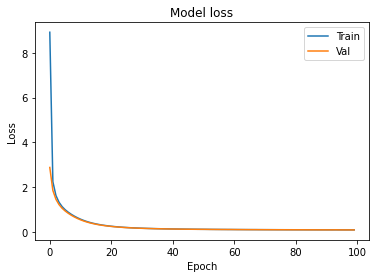

In [87]:
# Do the model evaluation
model.evaluate(X_test, Y_test)[1]

# Plot the model performance
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

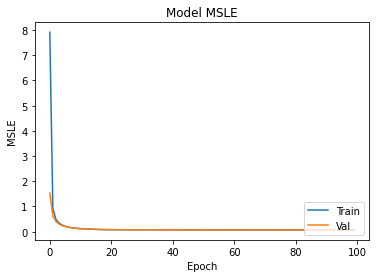

In [88]:
plt.plot(hist.history['msle'])
plt.plot(hist.history['val_msle'])
plt.title('Model MSLE')
plt.ylabel('MSLE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [89]:
# Predict the va;idation set
prediction = model.predict(X_val)

# Calculate the absolute errors
error = prediction - Y_val[0]
error = [abs(x) for x in error]

# Print out the mean absolute error (mae)
np.mean(error)

171/171 [==============================] - 0s 2ms/step


KeyError: 0

In [10]:
# calculate the absolute errors of baseline model
y_mode = mode(Y_val)
baseline_error = [abs(y_mode - x) for x in Y_val]
np.mean(baseline_error)

90.1511234150465

In [112]:
post_data = new_data.iloc[:,1:]
post_data.insert(0, "Postcode", postcode)

In [113]:
post_data

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Postcode_3000,Postcode_3002,Postcode_3004,Postcode_3008,...,Postcode_3975,Postcode_3977,Postcode_3978,Postcode_3980,Postcode_3981,Postcode_3984,Postcode_3987,Postcode_3992,Postcode_3995,Postcode_3996
0,3000,1,34652.148872,4.0,45.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3000,1,34652.148872,4.0,45.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3000,1,34652.148872,4.0,45.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3000,1,34652.148872,4.0,45.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3000,1,34652.148872,4.0,45.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36395,3996,1,36889.657143,0.0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36396,3996,1,36889.657143,0.0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36397,3996,1,36889.657143,0.0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36398,3996,2,36889.657143,0.0,0.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [142]:
# Update population in 2023/223/2025
pop = pd.read_csv("../data/curated/predicted_population.csv")
pop_2023 = pop[['Postcode','2023']]
pop_2024 = pop[['Postcode','2024']]
pop_2025 = pop[['Postcode','2025']]

pop_2023 = pd.merge(pop_2023, post_data, how = 'inner', on = ['Postcode'])
pop_2023 = pop_2023.drop(labels = ['Population'],axis = 1) 
pop_2023 = pop_2023.iloc[:,1:]

pop_2023['Count_School'] = pop_2023['Count_School'].fillna(value = 0)
pop_2023['Count_Station'] = pop_2023['Count_Station'].fillna(value = 0)
pop_2023 = pop_2023.dropna(axis = 0)
pop_2023 = pop_2023[(pop_2023['Baths'] > 0) & (pop_2023['Bedrooms'] > 0)]
pred_2023 = model.predict(pop_2023)
data.insert(7, 'Pred_2023', pred_2023)

pop_2024 = pd.merge(pop_2024, post_data, how = 'inner', on = ['Postcode'])
pop_2024 =pop_2024.drop(labels = ['Population'],axis = 1) 
pop_2024 = pop_2024.iloc[:,1:]

pop_2024['Count_School'] = pop_2024['Count_School'].fillna(value = 0)
pop_2024['Count_Station'] = pop_2024['Count_Station'].fillna(value = 0)
pop_2024 = pop_2024.dropna(axis=0)
pop_2024 = pop_2024[(pop_2024['Baths'] > 0) & (pop_2024['Bedrooms'] > 0)]
pred_2024 = model.predict(pop_2024)
data.insert(8, 'Pred_2024', pred_2024)

pop_2025 = pd.merge(pop_2025, post_data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'], axis=1) 
pop_2025 = pop_2025.iloc[:,1:]

pop_2025['Count_School'] = pop_2025['Count_School'].fillna(value = 0)
pop_2025['Count_Station'] = pop_2025['Count_Station'].fillna(value = 0)
pop_2025 = pop_2025.dropna(axis=0)
pop_2025 = pop_2025[(pop_2025['Baths'] > 0) & (pop_2025['Bedrooms'] > 0)]
pred_2025 = model.predict(pop_2025)
data.insert(9, 'Pred_2025', pred_2025)

1138/1138 [==============================] - 1s 1ms/step


In [143]:
data

,Weekly Rental Price,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Pred_2023,Pred_2024,Pred_2025
0,440.0,3000,1,34652.148872,4.0,45.0,1,493.001556,493.419952,493.768555
1,440.0,3000,1,34652.148872,4.0,45.0,1,493.001556,493.419952,493.768555
2,440.0,3000,1,34652.148872,4.0,45.0,1,493.001556,493.419952,493.768555
3,440.0,3000,1,34652.148872,4.0,45.0,1,493.001556,493.419952,493.768555
4,440.0,3000,1,34652.148872,4.0,45.0,1,493.001556,493.419952,493.768555
...,...,...,...,...,...,...,...,...,...,...
36395,420.0,3996,1,36889.657143,0.0,0.0,2,497.487976,499.181152,500.949188
36396,370.0,3996,1,36889.657143,0.0,0.0,2,497.487976,499.181152,500.949188
36397,370.0,3996,1,36889.657143,0.0,0.0,2,497.487976,499.181152,500.949188
36398,475.0,3996,2,36889.657143,0.0,0.0,3,497.493927,499.187073,500.955109


In [145]:
# Calculate growth rate
data['rate_2023'] = (data['Pred_2023'] - data['Weekly Rental Price']) / data['Weekly Rental Price']
data['rate_2024'] = (data['Pred_2024'] - data['Weekly Rental Price']) / data['Weekly Rental Price']
data['rate_2025'] = (data['Pred_2025'] - data['Weekly Rental Price']) / data['Weekly Rental Price']
data = data[["Postcode", "Weekly Rental Price", "Pred_2023", "Pred_2024", "Pred_2025", "rate_2023", "rate_2024", "rate_2025"]]


In [146]:
# Group by the data by the postcode
data = data.groupby(by = ['Postcode']).mean()
data = data.sort_values(by = ['rate_2023'], ascending = False)
data = data.head(10)
data.to_csv("../data/curated/NNpredi.csv")

In [147]:
data

,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025,rate_2023,rate_2024,rate_2025
Postcode,,,,,,,
3641,180.000000,458.585541,458.600800,458.616760,1.547697,1.547782,1.547871
3799,200.000000,466.257935,466.414398,466.575256,1.331290,1.332072,1.332876
3501,195.000000,451.434631,451.649689,451.874725,1.315049,1.316152,1.317306
3482,200.000000,448.704193,448.668854,448.637909,1.243521,1.243344,1.243190
3409,200.000000,443.676056,443.684052,443.696503,1.218380,1.218420,1.218483
3762,240.000000,495.297516,497.886902,500.577942,1.063740,1.074529,1.085741
3737,277.142857,468.892120,469.350067,469.834442,1.043684,1.045681,1.047792
3579,240.000000,467.126312,467.364136,467.634674,0.959971,0.960968,0.962104
3289,230.000000,448.761292,448.725830,448.691528,0.951136,0.950982,0.950833
